# Project :- Win Prediction

## Import libarary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pandas_profiling import ProfileReport

### Reading the data file

In [2]:
FullRaw = pd.read_excel("E:/New folder/project/Win Prediction/Win_Prediction_Data.xlsx")
FullRaw.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


## To create a simple profile report 

In [3]:
profile = ProfileReport(FullRaw,"Pandas Profiling Report",explorative = True)

In [4]:
profile.to_widgets()

In [3]:
FullRaw.shape

(10061, 9)

## Creating Deal status column

In [4]:
FullRaw['Deal Status'] = FullRaw['Deal Status Code']

In [5]:
FullRaw.describe().round(2)

,Deal Cost
count,10061.00
mean,766896.87
std,1619893.80
min,0.00
25%,189705.88
50%,382352.94
75%,764705.88
max,36764705.88


## Preliminary Analysis

In [6]:
FullRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
 9   Deal Status       10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 786.1+ KB


In [7]:
pd.DataFrame(FullRaw.nunique())

,0
Client Category,41
Solution Type,67
Deal Date,2555
Sector,25
Location,13
VP Name,43
Manager Name,278
Deal Cost,1469
Deal Status Code,2
Deal Status,2


## Check for missing values and imputation

In [8]:
FullRaw.isnull().sum()

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
Deal Status          0
dtype: int64

In [9]:
FullRaw['Client Category'].mode()

0    Others
dtype: object

## Removing observation where Deal Cost is 0.

In [10]:
FullRaw = FullRaw[FullRaw["Deal Cost"] > 0 ]
FullRaw.shape

(9815, 10)

In [11]:
FullRaw['Client Category'] = FullRaw['Client Category'].fillna('Others')

In [12]:
FullRaw.isna().sum()

Client Category     0
Solution Type       0
Deal Date           0
Sector              0
Location            0
VP Name             0
Manager Name        0
Deal Cost           0
Deal Status Code    0
Deal Status         0
dtype: int64

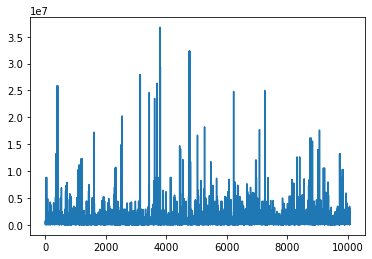

In [13]:
## we see the dealcost data 

plt.plot(FullRaw['Deal Cost'])

## Removing duplicate values

In [14]:
FullRaw = FullRaw.drop_duplicates()
FullRaw.shape

(9802, 10)

In [15]:
FullRaw.head(10)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal Status
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,Lost
5,Internal,Solution 32,2011-05-24,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,Lost
6,Internal,Solution 59,2011-11-03,Sector 2,L10,Mervin Harwood,rahul sharma,526176.47,Won,Won
7,Govt,Solution 7,2012-09-17,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88,Lost,Lost
8,Consumer Good,Solution 42,2012-04-11,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,Won,Won
9,Internal,Solution 59,2011-11-17,Sector 20,Others,Sargar Deep Rao,Hardeep Suksma,558823.53,Lost,Lost


In [16]:
FullRaw['Deal Status Code']=np.where(FullRaw['Deal Status']=="Won",1,0)

In [17]:
FullRaw['VP Name and Manager'] = FullRaw['VP Name'] + ' & '+ FullRaw['Manager Name']

In [18]:
FullRaw = FullRaw.drop('Deal Date',axis = 1)

In [19]:
df = FullRaw.copy()

## Feature engineering

In [20]:
ordinal_label = {k: i for i, k in enumerate(FullRaw['Client Category'].unique(), 0)}
FullRaw['Client Category'] = FullRaw['Client Category'].map(ordinal_label)

ordinal_label = {k: i for i, k in enumerate(FullRaw['Solution Type'].unique(), 0)}
FullRaw['Solution Type'] = FullRaw['Solution Type'].map(ordinal_label)

ordinal_label = {k: i for i, k in enumerate(FullRaw['Sector'].unique(), 0)}
FullRaw['Sector'] = FullRaw['Sector'].map(ordinal_label)

ordinal_label = {k: i for i, k in enumerate(FullRaw['Location'].unique(), 0)}
FullRaw['Location'] = FullRaw['Location'].map(ordinal_label)

ordinal_label = {k: i for i, k in enumerate(FullRaw['VP Name'].unique(), 0)}
FullRaw['VP Name'] = FullRaw['VP Name'].map(ordinal_label)

ordinal_label = {k: i for i, k in enumerate(FullRaw['Manager Name'].unique(), 0)}
FullRaw['Manager Name'] = FullRaw['Manager Name'].map(ordinal_label)

ordinal_label = {k: i for i, k in enumerate(FullRaw['VP Name and Manager'].unique(), 0)}
FullRaw['VP Name and Manager'] = FullRaw['VP Name and Manager'].map(ordinal_label)

In [21]:
FullRaw.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal Status,VP Name and Manager
0,0,0,0,0,0,0,150000.00,1,Won,0
1,0,0,0,0,0,0,744705.88,1,Won,0
2,1,1,1,1,0,1,60000.00,0,Lost,1
3,1,1,1,1,0,1,60000.00,0,Lost,1
4,1,2,1,1,0,1,80882.35,0,Lost,1


In [22]:
### train Test split is usually done to avaoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(FullRaw[['Client Category','Solution Type','Sector','Location','VP Name','Manager Name','VP Name and Manager']],
                                              FullRaw['Deal Status Code'],test_size=0.3,random_state=100)

In [23]:
X_train.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,VP Name and Manager
8617,40,54,12,0,2,40,53
608,15,16,2,2,6,15,137
5901,33,43,4,0,16,14,161
867,10,2,7,5,0,60,104
5232,17,2,7,8,8,58,544


In [24]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

In [25]:
f_p_values

(array([ 291.95704243, 1240.67135016,   38.9807886 ,   47.79579261,
          88.37290406,    1.90992089,    3.10460588]),
 array([1.86268468e-065, 8.83897129e-272, 4.27996715e-010, 4.73006032e-012,
        5.42082888e-021, 1.66972047e-001, 7.80711251e-002]))

In [26]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

Client Category         1.862685e-65
Solution Type          8.838971e-272
Sector                  4.279967e-10
Location                4.730060e-12
VP Name                 5.420829e-21
Manager Name            1.669720e-01
VP Name and Manager     7.807113e-02
dtype: float64

In [27]:
p_values.sort_index(ascending=True)

Client Category         1.862685e-65
Location                4.730060e-12
Manager Name            1.669720e-01
Sector                  4.279967e-10
Solution Type          8.838971e-272
VP Name                 5.420829e-21
VP Name and Manager     7.807113e-02
dtype: float64

## Subsetting categorical data

### dataframe for top 5 won bidding deal

In [28]:
# for win cost
df['Deal Status'] = df['Deal Status Code']
FullRaw_wins = df[df['Deal Status Code']== 1]
FullRaw_wins.shape

(3751, 10)

In [29]:
FullRaw_wins.head(3)

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal Status,VP Name and Manager
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,1,1,Ekta Zutshi & Gopa Trilochana
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,1,1,Ekta Zutshi & Gopa Trilochana
6,Internal,Solution 59,Sector 2,L10,Mervin Harwood,rahul sharma,526176.47,1,1,Mervin Harwood & rahul sharma


In [30]:
def top_dealcost(x,y,n=5):
    col_names = {'Deal Cost':'Total Deal Cost', 'Deal Status Code': 'Total Deals'}
    temp_df = FullRaw_wins.groupby(['VP Name', 'Manager Name']).agg({'Deal Cost':'max', 'Deal Status Code': 'sum'}).rename(columns=col_names).sort_values(by='Total Deal Cost', ascending=False).head(n)
    return temp_df

In [31]:
SBU_Head_Bid_Manager = pd.DataFrame(top_dealcost('VP Name','Manager Name'))

In [32]:
SBU_Head_Bid_Manager

Total Deal Cost  Total Deals
VP Name          Manager Name                                
Varsha Arora     Rahul Singh         36764705.88            6
                 Sarwan Singh        26352941.18            6
Mangesh K. Singh Vinay Kumar         25000000.00            3
Brendon Wycoff   vansu dev           24823529.41           10
Mangesh K. Singh Zulema Perrine      24630882.35            9

In [33]:
## for lost cost
FullRaw_lost = df[df['Deal Status Code']==0]
FullRaw_lost.shape

(6051, 10)

### dataframe for top 5 lost bidding deal

In [34]:
def lost_dealcost(x,y,n=5):
    col_names = {'Deal Cost':'Avg Deal Cost', 'Deal Status Code': 'Total Deals'}
    temp_df = FullRaw_lost.groupby(['VP Name', 'Manager Name']).agg({'Deal Cost':'min', 'Deal Status Code': 'sum'}).rename(columns=col_names).sort_values(by='Avg Deal Cost').head(n)
    return temp_df

In [35]:
SBU_head_Bid_lost_manager = pd.DataFrame(lost_dealcost('VP Name','Manager Name'))

In [36]:
SBU_head_Bid_lost_manager.head()

Avg Deal Cost  Total Deals
VP Name          Manager Name                                        
Mervin Harwood   D. Ankit                         294.12            0
Rosanna Maynez   Hardeep Suksma                  1470.59            0
                 bablu regar                     1470.59            0
Mangesh K. Singh mayank chaudhary @ rahul        1470.59            0
Rosanna Maynez   Saurabh Singh                   1470.59            0

## Testing and cross validation

In [37]:
FullRaw.drop(['VP Name','Manager Name','VP Name and Manager'], axis = 1, inplace = True)

In [38]:
FullRaw.head()

,Client Category,Solution Type,Sector,Location,Deal Cost,Deal Status Code,Deal Status
0,0,0,0,0,150000.00,1,Won
1,0,0,0,0,744705.88,1,Won
2,1,1,1,1,60000.00,0,Lost
3,1,1,1,1,60000.00,0,Lost
4,1,2,1,1,80882.35,0,Lost


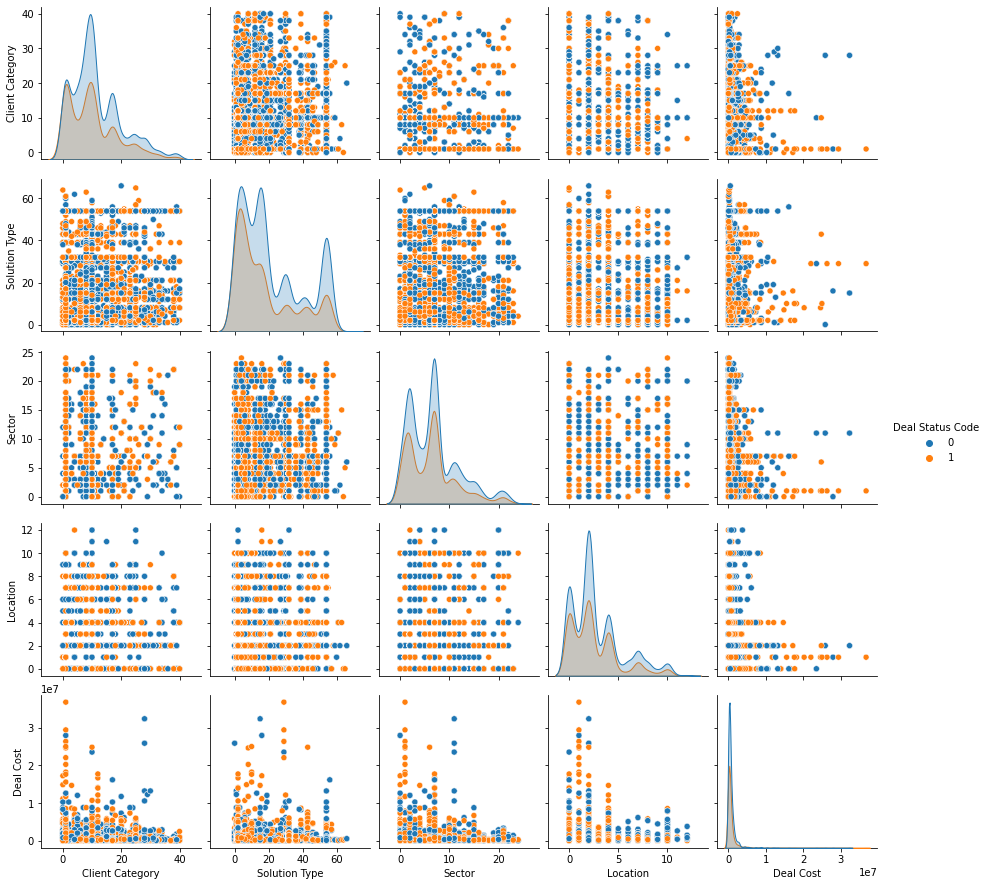

In [39]:
import seaborn as sns
sns.pairplot(FullRaw, hue = 'Deal Status Code')

In [40]:
# Split data in independent(X) and dependent(Y) 
X = FullRaw.drop(['Deal Status Code','Deal Status'], axis = 1)

Y = FullRaw['Deal Status Code']
Y.head()

0    1
1    1
2    0
3    0
4    0
Name: Deal Status Code, dtype: int32

In [41]:
X.head(3)

,Client Category,Solution Type,Sector,Location,Deal Cost
0,0,0,0,0,150000.00
1,0,0,0,0,744705.88
2,1,1,1,1,60000.00


In [42]:
Y.head(3)

0    1
1    1
2    0
Name: Deal Status Code, dtype: int32

In [43]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((7351, 5), (2451, 5), (7351,), (2451,))

## Model building(trying various techniques)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [85]:
key = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier']
value = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 2, weights ='uniform'), DecisionTreeClassifier(random_state=10), RandomForestClassifier(n_estimators=61, random_state=10)]
models = dict(zip(key,value))
models

{'LogisticRegression': LogisticRegression(),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=61, random_state=10)}

In [86]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,Y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(Y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.6270909832721339
KNeighborsClassifier 0.7315381476948184
DecisionTreeClassifier 0.7858017135862914
RandomForestClassifier 0.8004895960832313


## Precision, Recall, Accuracy, AUC

In [87]:
# find accuracy_score, confusion_matrix

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve , plot_confusion_matrix, plot_precision_recall_curve

def algo(algorithm):
    model = algorithm()
    model.fit(X_train, Y_train)
    predict = model.predict(X_test)
    print('The accuracy of {} model is {}'.format(model, accuracy_score(Y_test, predict).round(2)))
    
    print("\n")
    print("CLASSIFICATION REPORT",'\n',classification_report(Y_test, predict),"\n")
    
    print("CONFUSION MATRIX",'\n')
    
    plot_confusion_matrix(model, X_test, Y_test, cmap = "GnBu")
    
    plot_roc_curve(model,X_test,Y_test)
    
    plot_precision_recall_curve(model,X_test,Y_test)

The accuracy of DecisionTreeClassifier() model is 0.78


CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.79      0.88      0.84      1537
           1       0.75      0.62      0.68       914

    accuracy                           0.78      2451
   macro avg       0.77      0.75      0.76      2451
weighted avg       0.78      0.78      0.78      2451
 

CONFUSION MATRIX 



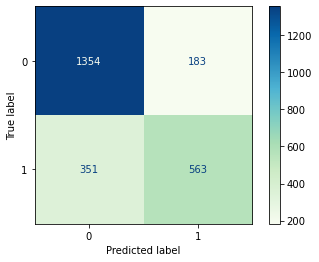

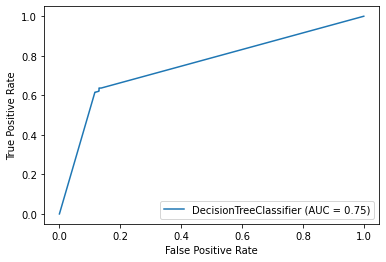

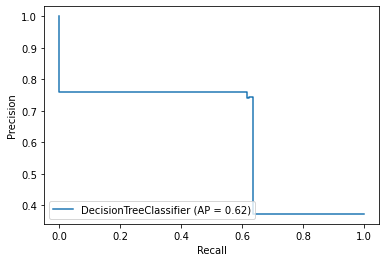

In [88]:
algo(DecisionTreeClassifier)

The accuracy of RandomForestClassifier() model is 0.8


CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.79      0.92      0.85      1537
           1       0.81      0.59      0.69       914

    accuracy                           0.80      2451
   macro avg       0.80      0.76      0.77      2451
weighted avg       0.80      0.80      0.79      2451
 

CONFUSION MATRIX 



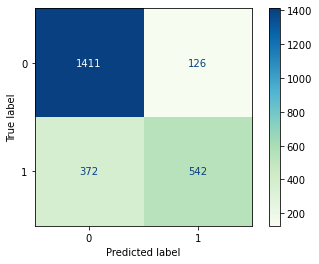

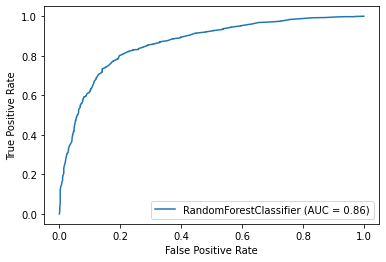

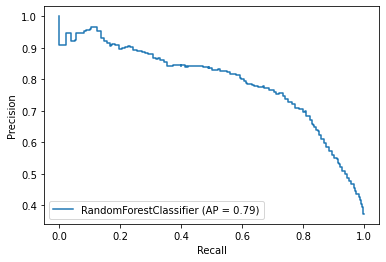

In [107]:
algo(RandomForestClassifier)

In [ ]:
# According to the confusion matrix :
# We check if deal status code is 1 means deal is won and prediction is 0 means is lost the deal
# And if deal status code is 0 means deal is lost and prediction is 1 means deal is won.

372 + 126 = 496

In [90]:
df1 = pd.DataFrame({'Actual':Y_test, 'Predicted':predict})

In [91]:
Loss_df = pd.concat([X_test, df1], axis=1)
Loss_df

,Client Category,Solution Type,Sector,Location,Deal Cost,Actual,Predicted
6755,8,2,7,0,286764.71,0,0
3008,5,2,2,7,735294.12,0,0
4813,11,30,12,2,176470.59,0,0
5151,1,39,1,1,882352.94,0,0
1407,39,8,5,4,1823529.41,0,0
...,...,...,...,...,...,...,...
4589,8,2,7,0,838235.29,1,1
7098,1,54,1,1,1029411.77,1,1
9493,13,32,9,0,441176.47,0,0
2331,30,6,10,0,2058823.53,1,1


In [92]:
comparison_column = np.where(Loss_df["Actual"] == Loss_df["Predicted"], True, False)    

Loss_df["equal"] = comparison_column
Loss_df

Totalloss = Loss_df[Loss_df['equal']== False]
Totalloss.shape

(489, 8)

In [93]:
Totalloss['Deal Cost'].sum()

418408529.71000004

In [94]:
Loss_df.to_csv('loss.csv')